In [1]:
cd D:\Nalaiya Thiran\Dataset Plant Disease


D:\Nalaiya Thiran\Dataset Plant Disease


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)
x_train = train_datagen.flow_from_directory(r'D:\Nalaiya Thiran\Dataset Plant Disease\fruit-dataset\fruit-dataset\train',target_size=(64,64),class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [4]:
x_test = train_datagen.flow_from_directory(r'D:\Nalaiya Thiran\Dataset Plant Disease\fruit-dataset\fruit-dataset\test',target_size=(64,64),class_mode='categorical',batch_size=24)

Found 1686 images belonging to 6 classes.


In [5]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [7]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(Dense(800,activation='relu'))
model.add(Dense(650,activation='relu'))

In [9]:
model.add(Dense(6,activation='softmax'))
len(x_train)

225

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
225/225 [==============================] - 48s 211ms/step - loss: 0.7575 - accuracy: 0.7834 - val_loss: 0.2438 - val_accuracy: 0.9199
Epoch 2/10
225/225 [==============================] - 39s 171ms/step - loss: 0.2540 - accuracy: 0.9120 - val_loss: 0.3236 - val_accuracy: 0.8826
Epoch 3/10
225/225 [==============================] - 39s 175ms/step - loss: 0.2118 - accuracy: 0.9248 - val_loss: 0.1707 - val_accuracy: 0.9437
Epoch 4/10
225/225 [==============================] - 39s 173ms/step - loss: 0.1760 - accuracy: 0.9389 - val_loss: 0.1151 - val_accuracy: 0.9591
Epoch 5/10
225/225 [==============================] - 39s 173ms/step - loss: 0.1273 - accuracy: 0.9569 - val_loss: 0.1087 - val_accuracy: 0.9620
Epoch 6/10
225/225 [==============================] - 39s 174ms/step - loss: 0.1197 - accuracy: 0.9577 - val_loss: 0.1114 - val_accuracy: 0.9644
Epoch 7/10
225/225 [==============================] - 39s 172ms/step - loss: 0.1029 - accuracy: 0.9649 - val_loss: 0.1210 - val_ac

In [14]:
model.save('fruit_dataset.h5')

In [15]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('fruit_dataset.h5')

In [22]:
img=image.load_img(r'D:\Nalaiya Thiran\Dataset Plant Disease\fruit-dataset\fruit-dataset\test\Peach___Bacterial_spot\00f87dfc-bf6c-481e-9022-bfb98224d4b7___Rutg._Bact.S 1965.JPG')

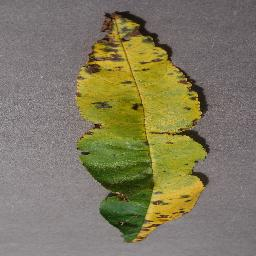

In [23]:
img

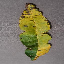

In [29]:
img=image.load_img(r'D:\Nalaiya Thiran\Dataset Plant Disease\fruit-dataset\fruit-dataset\test\Peach___Bacterial_spot\00f87dfc-bf6c-481e-9022-bfb98224d4b7___Rutg._Bact.S 1965.JPG',target_size=(64,64))
img

In [30]:
x=image.img_to_array(img)
x

array([[[118., 114., 115.],
        [118., 114., 115.],
        [118., 114., 115.],
        ...,
        [100.,  94.,  96.],
        [ 97.,  91.,  93.],
        [ 92.,  86.,  88.]],

       [[128., 124., 125.],
        [126., 122., 123.],
        [117., 113., 114.],
        ...,
        [102.,  96.,  98.],
        [ 96.,  90.,  92.],
        [103.,  97.,  99.]],

       [[133., 129., 130.],
        [125., 121., 122.],
        [127., 123., 124.],
        ...,
        [101.,  95.,  97.],
        [ 92.,  86.,  88.],
        [ 97.,  91.,  93.]],

       ...,

       [[147., 143., 144.],
        [146., 142., 143.],
        [145., 141., 142.],
        ...,
        [124., 120., 121.],
        [122., 118., 119.],
        [122., 118., 119.]],

       [[147., 143., 144.],
        [145., 141., 142.],
        [141., 137., 138.],
        ...,
        [125., 121., 122.],
        [124., 120., 121.],
        [118., 114., 115.]],

       [[146., 142., 143.],
        [147., 143., 144.],
        [149., 1

In [31]:
x=np.expand_dims(x,axis=0)
x

array([[[[118., 114., 115.],
         [118., 114., 115.],
         [118., 114., 115.],
         ...,
         [100.,  94.,  96.],
         [ 97.,  91.,  93.],
         [ 92.,  86.,  88.]],

        [[128., 124., 125.],
         [126., 122., 123.],
         [117., 113., 114.],
         ...,
         [102.,  96.,  98.],
         [ 96.,  90.,  92.],
         [103.,  97.,  99.]],

        [[133., 129., 130.],
         [125., 121., 122.],
         [127., 123., 124.],
         ...,
         [101.,  95.,  97.],
         [ 92.,  86.,  88.],
         [ 97.,  91.,  93.]],

        ...,

        [[147., 143., 144.],
         [146., 142., 143.],
         [145., 141., 142.],
         ...,
         [124., 120., 121.],
         [122., 118., 119.],
         [122., 118., 119.]],

        [[147., 143., 144.],
         [145., 141., 142.],
         [141., 137., 138.],
         ...,
         [125., 121., 122.],
         [124., 120., 121.],
         [118., 114., 115.]],

        [[146., 142., 143.],
       

In [32]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 2s 2s/step


array([1], dtype=int64)

In [33]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [34]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight','Peach___Bacterial_spot','Peach___healthy']

In [35]:
index[y[0]]

'Apple___healthy'